In [1]:
import sys
#Move to parent folder
sys.path.insert(0, '../../croprows-cli/src/')

import croprows_globals as crglobals

import croprows_utils as crutils
import croprows_geo as crgeo

import imp 
imp.reload(crglobals)
imp.reload(crutils)
imp.reload(crgeo)

import pandas as pd
import geopandas as gpd
import json
import geojson
from shapely.geometry import shape
from shapely.wkt import dumps, loads
from shapely.geometry import Point
from shapely.geometry.polygon import LineString, LinearRing, Polygon

import os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import re

####################################################################

 #####  ######  ####### ######  ######  ####### #     #  #####     
#     # #     # #     # #     # #     # #     # #  #  # #     #    
#       #     # #     # #     # #     # #     # #  #  # #          
#       ######  #     # ######  ######  #     # #  #  #  #####     
#       #   #   #     # #       #   #   #     # #  #  #       #    
#     # #    #  #     # #       #    #  #     # #  #  # #     #    
 #####  #     # ####### #       #     # #######  ## ##   #####     
                                                  Version 1.0		

####################################################################
croprows_globals [ module loaded ]
croprows_utils [ module loaded ]
croprows_image_processing [ module loaded ]
croprows_fileutils [ module loaded ]
croprows_geo [ module loaded ]
####################################################################

 #####  ######  ####### ######  ######  ####### #     #  #####     
# 

In [2]:
file_lines1 = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/mosaic-cl_3-rw_2_lines_ext.shp'
bounds_lines1 = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/mosaic-cl_3-rw_2.geojson'

file_lines2 = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/mosaic-cl_3-rw_3_lines_ext.shp'
bounds_lines2 = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles//vectors/mosaic-cl_3-rw_3.geojson'

(378935.83917887101, 378955.83917887101)

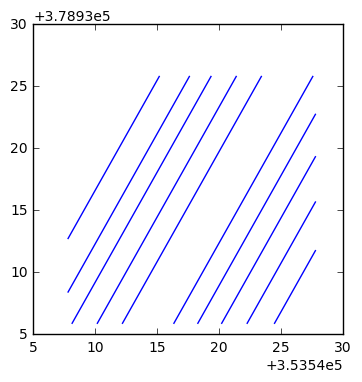

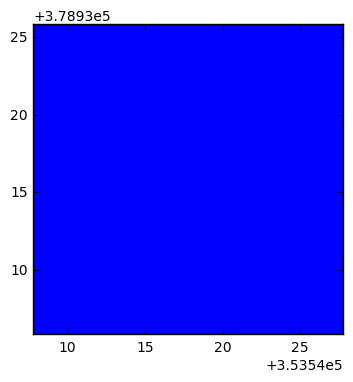

In [3]:
lineas1 = gpd.GeoDataFrame.from_file(file_lines1)
boxl = gpd.GeoDataFrame.from_file(bounds_lines1)
#print(lineas)
#print(lineas.geometry.bounds)
lineas1.geometry.plot()
boxl.geometry.plot()

plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])

In [4]:
lineas2 = gpd.GeoDataFrame.from_file(file_lines2)
box2 = gpd.GeoDataFrame.from_file(bounds_lines2)
#print(lineas)
#print(lineas.geometry.bounds)
lineas2.geometry.plot()
box2.geometry.plot()

plt.xlim([np.min(box2.geometry.bounds.minx), np.max(box2.geometry.bounds.maxx)])
plt.ylim([np.min(box2.geometry.bounds.miny), np.max(box2.geometry.bounds.maxy)])

OSError: no such file or directory: '../../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/mosaic-cl_3-rw_3_lines_ext.shp'

In [ ]:
from shapely.ops import snap
res = lineas1
lineas2_union = lineas2.geometry.unary_union
res.geometry = lineas1.geometry.apply(lambda x: snap(x, lineas2_union, 0.005))

In [ ]:
res.geometry.plot()

In [ ]:
file_snap = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/test_snap1.shp'
crs = {'init': 'epsg:32618'}

dd=gpd.GeoDataFrame(crs=crs, geometry=res.geometry)
dd.to_file(driver = 'ESRI Shapefile', filename= file_snap)

In [ ]:
res.geometry

In [ ]:
#Merging all lines

In [ ]:
from os import walk

mypath = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/'

lineask = []

import os
for file in os.listdir(mypath):
    if file.endswith(".shp"):
        if file.startswith("mosaic"):
            filesm = os.path.join(mypath, file)
            print(filesm)
            lineask.append( gpd.GeoDataFrame.from_file(filesm) )
        

In [ ]:
lineask[0]

In [ ]:
type(lineask[0])

In [ ]:
merged=[]
a=0
for i in lineask:
    merged.append(lineask[a])
    a+=1
    

#print(merged)

#result = pd.concat([merged[0],merged[1],merged[2],merged[3], merged[4] , merged[5] ],axis=0)

#frames = [merged[0], merged[1], merged[2]]

#print(frames)

result = pd.concat(merged,axis=0)
result

result.plot()


file_merged = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/test_merged.shp'
result.to_file(driver = 'ESRI Shapefile', filename= file_merged)



In [ ]:
crs = {'init': 'epsg:32618'}

col = result.columns.tolist()[:-1]
#[0:5]
print(col)
nodes = gpd.GeoDataFrame(crs=crs, columns=col)
# extraction of nodes and attribute values nouveau GeoDataFrame
for index, row in result.iterrows():
    for pt in list(row['geometry'].coords):
        print(row['geometry'].coords)
        #nodes = nodes.append({'col': int(row['col']), 'row': int(row['row']),  'distance':int(row['distance']),'id':int(row['id']), 'geometry':Point(pt) },ignore_index=True)
        nodes = nodes.append({'col': int(row['col']), 'row': int(row['row']),'id':int(row['id']), 'geometry':Point(pt) },ignore_index=True)
nodes.head(5)

file_mergedk = '../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/test_merged_points.shp'
nodes.to_file(driver = 'ESRI Shapefile', filename= file_mergedk)


In [ ]:
from shapely.geometry import Point
for index, row in result.iterrows():
     for pt in list(row['geometry'].coords): 
        print(Point(pt))

In [ ]:
################################################## FIN ############################################

In [ ]:
lineask[1].geometry[0].wkt

In [ ]:
lineask[2].id[0]

In [ ]:
len(lineask)

In [ ]:
ff=0
for f in lineask:
    #print(lineask[ff].id[0])
    jj=0
    for d in lineask[ff].id:
        #print('d')
        print(lineask[ff].id[jj])
        print(lineask[ff].geometry[jj].wkt)
        jj+=1
    ff+=1

In [ ]:
#llllineas = []
#idllineas = []
#a=0
#for i in lineask:
    #print(lineask[a].geometry)
#    llllineas.append([lineask[a].geometry])
#    idllineas.append(lineask[a].id)
    #print(lineask[a].id)
#    a+=1

In [ ]:
#crs = {'init': 'epsg:32618'}
#dffixedlines = pd.DataFrame({ 'id': idllineas  })


#lineask[1]

#geodffixedlines=gpd.GeoDataFrame(crs=crs, geometry=lineask)
#geodffixedlines.dropna()

<h1> TEST FUNCTION ->  mergeAllLines</h1>

In [ ]:
crgeo.mergeAllLines('../../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/',32618)